# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Handi Sutriyan 
- Email: handisutrian@gmail.com
- Id Dicoding: handisutriyan

## Persiapan

### Menyiapkan library yang dibutuhkan

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import openpyxl

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

### Menyiapkan data yang akan digunakan

In [3]:
raw_df = pd.read_csv('data.csv',sep=None, engine='python')

## Data Understanding

In [4]:
raw_df.head()

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [26]:
raw_df.columns

Index(['﻿Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wi

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ﻿Marital_status                               4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [6]:
raw_df.describe()

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [28]:
n_status = raw_df['Status'].value_counts()
n_status

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

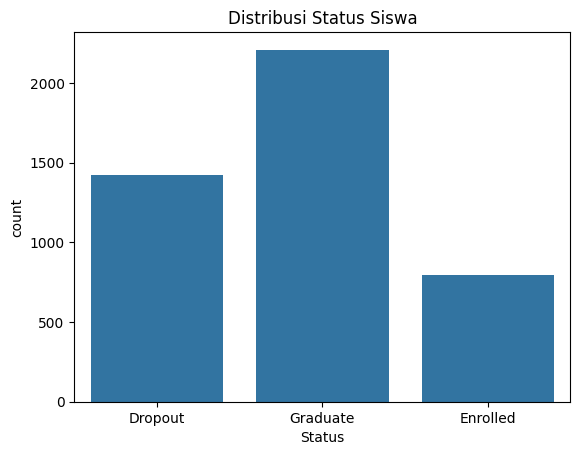

In [30]:
sns.countplot(x='Status', data=raw_df)
plt.title("Distribusi Status Siswa")
plt.show()

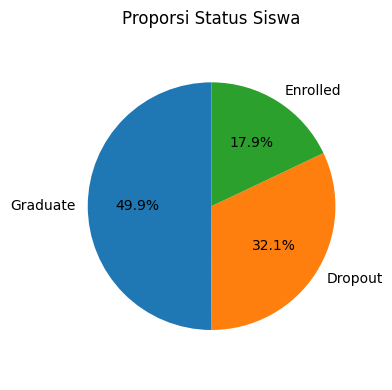

In [37]:
labels =n_status.index
sizes = n_status.values

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Proporsi Status Siswa')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.tight_layout()
plt.show()

In [38]:
status_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
raw_df['Status_encoded'] = raw_df['Status'].map(status_mapping)

In [42]:
corr_df = raw_df.corr(numeric_only=True)
corr_df

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status_encoded
﻿Marital_status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804
Application_mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.221747
Application_order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.034219
Daytime_evening_attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107
Previous_qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.056039
Previous_qualification_grade,-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.103764
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,-0.014801
Mothers_qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657,-0.043178
Fathers_qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610,-0.001393


In [43]:
status_corr = corr_df['Status_encoded'].drop('Status_encoded')
sorted_corr = status_corr.sort_values(ascending=False)
print("Peringkat Korelasi Variabel Numerik terhadap Tingkat Attrition")
sorted_corr

Peringkat Korelasi Variabel Numerik terhadap Tingkat Attrition


Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.048150
Curricular_units_1st_sem_evaluations            0.044362
GDP                            

<Axes: >

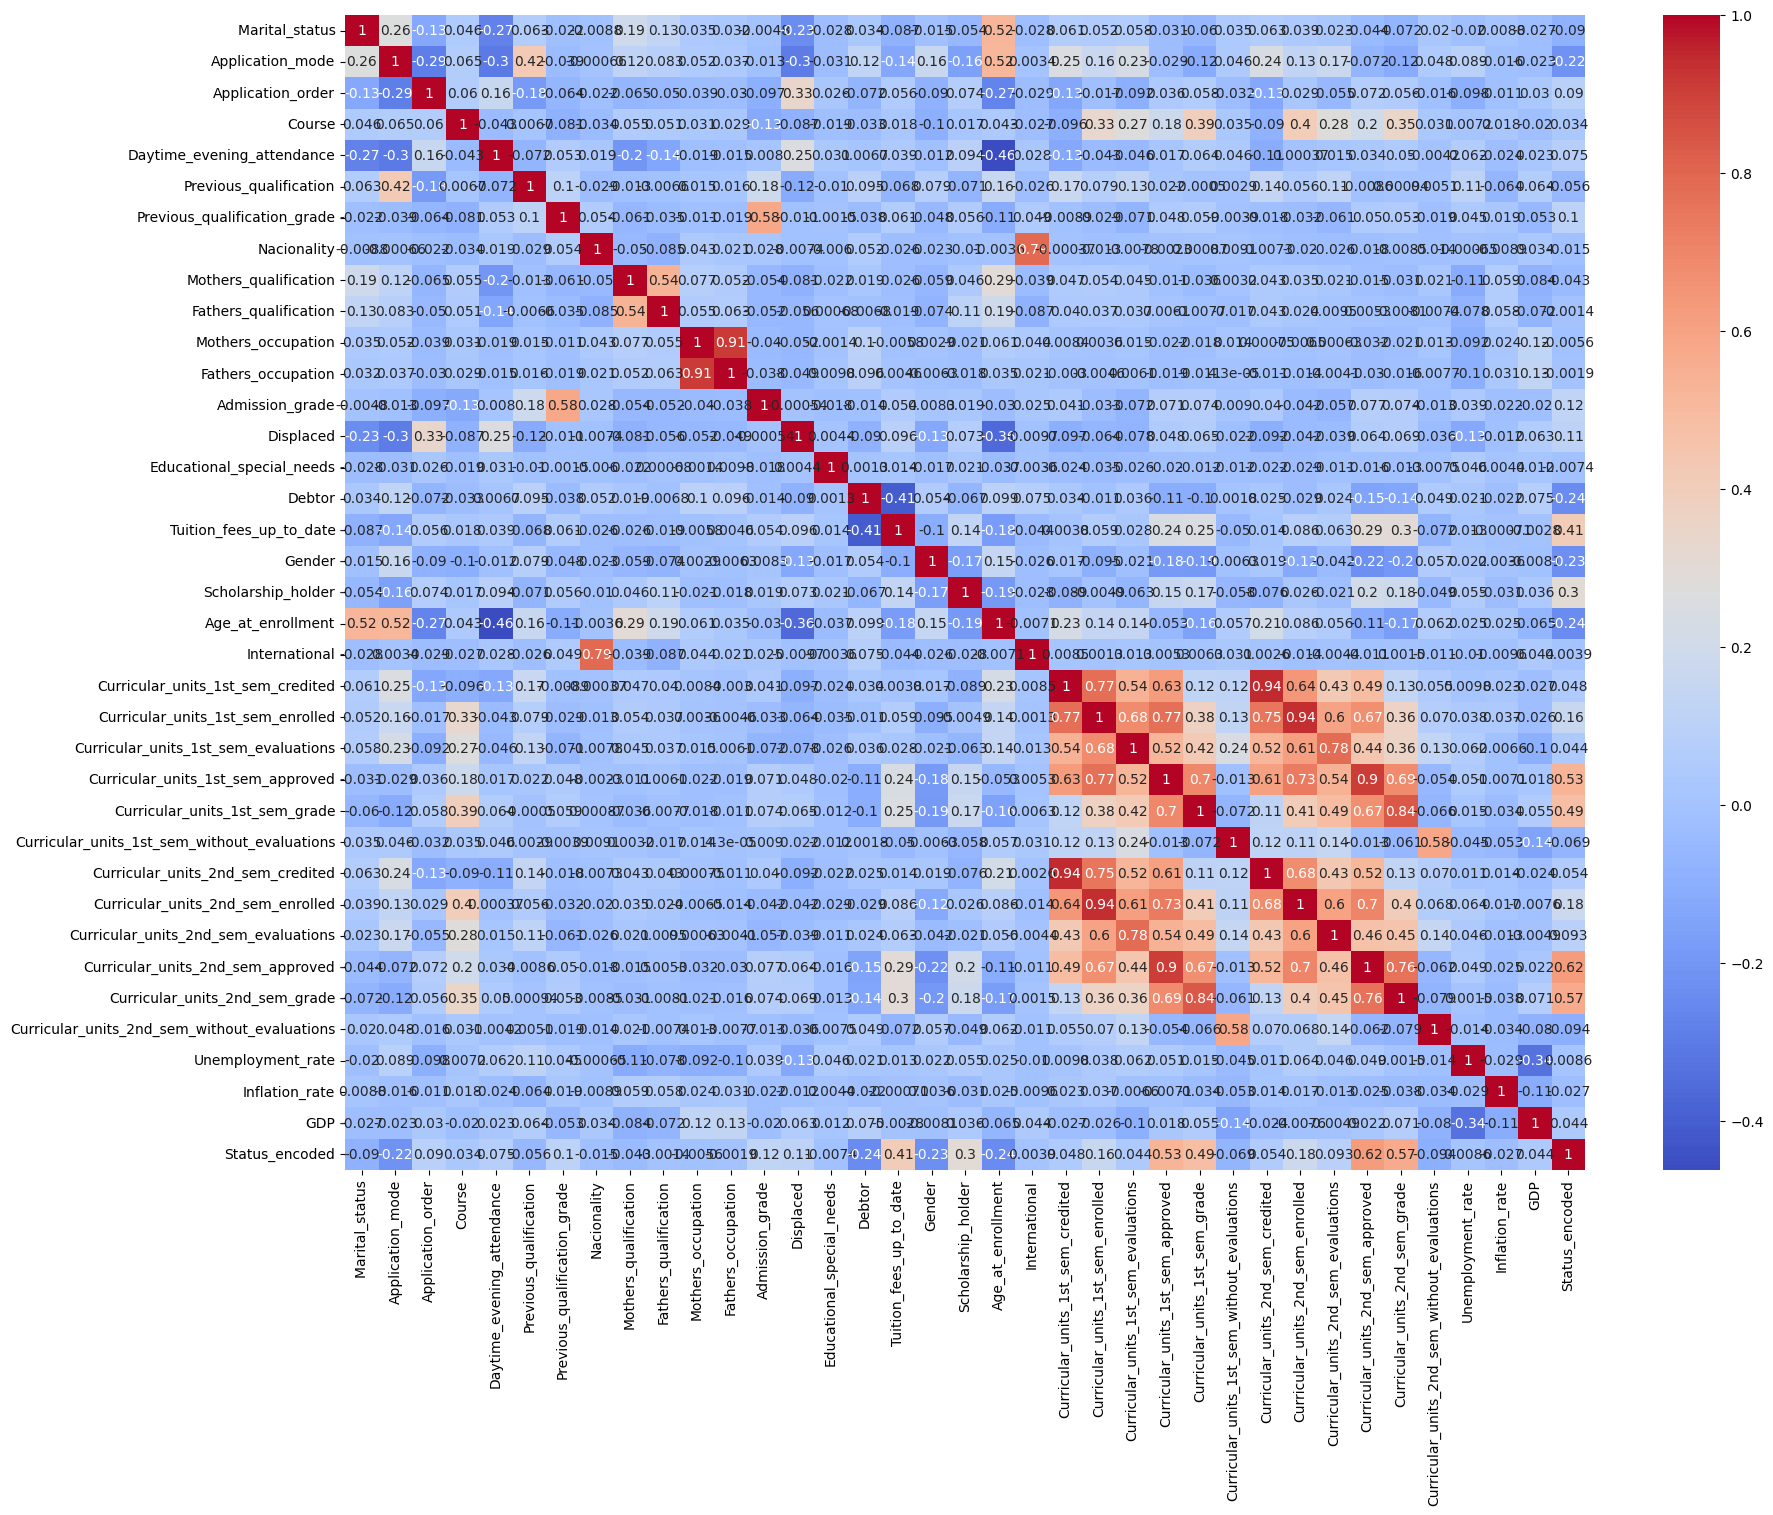

In [41]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

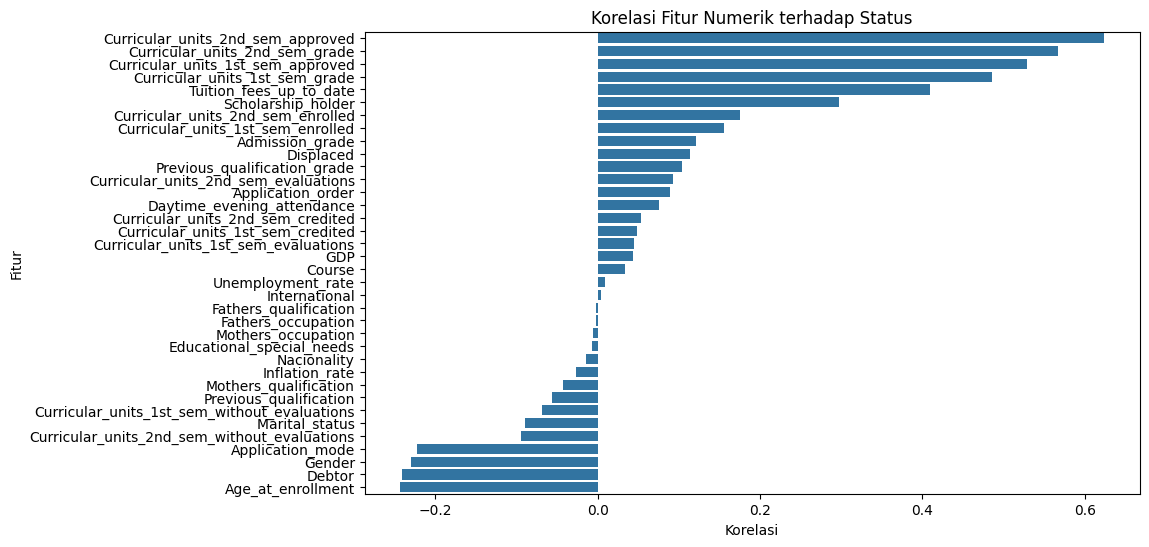

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index)
plt.title("Korelasi Fitur Numerik terhadap Status")
plt.xlabel("Korelasi")
plt.ylabel("Fitur")
plt.show()

In [ ]:
# Cek nilai rata-rata setiap kolom untuk masing-masing status 
raw_df.groupby('Status').mean(numeric_only=True)


,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status_encoded
Status,,,,,,,,,,,,,,,,,,,,,
Dropout,1.261084,23.712878,1.593244,8755.629838,0.854328,5.311049,131.114075,1.957072,21.035186,22.683322,...,0.449683,5.780436,7.173821,1.940183,5.899339,0.237861,11.616397,1.283955,-0.150859,0.0
Enrolled,1.152393,19.799748,1.625945,8868.811083,0.905542,4.785894,131.208438,2.079345,17.622166,20.920655,...,0.358942,5.938287,9.435768,4.057935,11.117364,0.187657,11.272544,1.211713,0.053287,1.0
Graduate,1.134903,15.018108,1.851064,8917.248076,0.909009,4.031236,134.082707,1.745134,19.311453,22.499774,...,0.666818,6.628339,8.142146,6.177003,12.697276,0.080579,11.639339,1.197918,0.081833,2.0


## Data Preparation / Preprocessing

In [101]:
prep_df = raw_df.copy()
prep_df.columns

Index(['﻿Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wi

In [102]:
bool_cols = ['Displaced','Educational_special_needs', 'Debtor','Tuition_fees_up_to_date','Scholarship_holder','International']
prep_df[bool_cols] = prep_df[bool_cols].astype(bool)
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ﻿Marital_status                               4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [103]:
prep_df['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [110]:
#OrdinalEncoder
encoded_df = prep_df.copy()
encoder = LabelEncoder()
encoded_df['Status'] = encoder.fit_transform(encoded_df['Status'])

In [111]:
encoded_df = encoded_df.drop(columns='Status_encoded')
encoded_df.columns

Index(['﻿Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wi

In [112]:
# Split data
X = encoded_df.drop(columns='Status')
y = encoded_df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [113]:
# Normalisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

In [114]:
#SMOTE
smote = SMOTE(random_state=42)
#SMOTE balancing
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [115]:
#Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [116]:
# Definisikan model
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Grid search
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

grid_xgb.fit(X_train_bal, y_train_bal)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [117]:
# Logistic Regression dengan hyperparameter tuning
lr = LogisticRegression(max_iter=1000, random_state=42)
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}
#SMOTE balancing
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

grid_lr = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
grid_lr.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

## Evaluation

In [118]:
# Evaluasi model terbaik
models = {
    'Logistic Regression': grid_lr.best_estimator_,
    'Random Forest' : grid_rf.best_estimator_,
    'XGBoost': grid_xgb.best_estimator_,
}


Logistic Regression Evaluation:


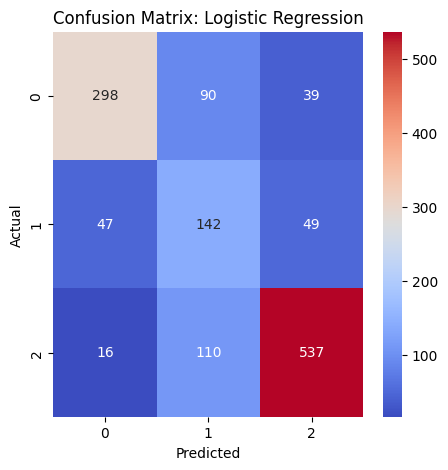


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       427
           1       0.42      0.60      0.49       238
           2       0.86      0.81      0.83       663

    accuracy                           0.74      1328
   macro avg       0.70      0.70      0.69      1328
weighted avg       0.77      0.74      0.75      1328

 Accuracy: 0.7357| Precission: 0.7688| F-1: 0.7472


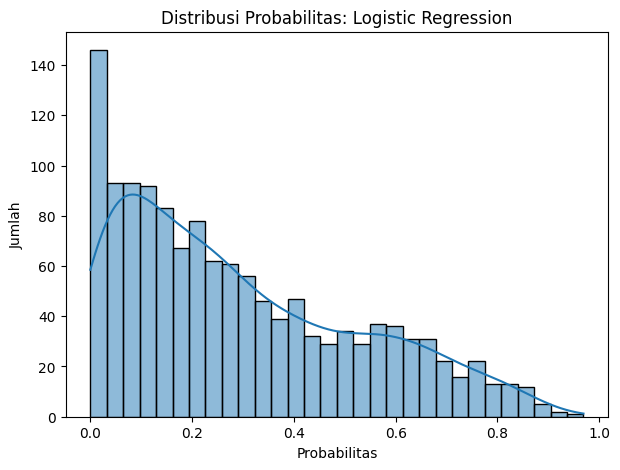


Random Forest Evaluation:


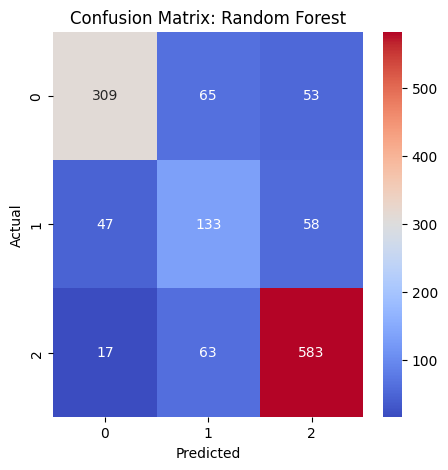


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       427
           1       0.51      0.56      0.53       238
           2       0.84      0.88      0.86       663

    accuracy                           0.77      1328
   macro avg       0.73      0.72      0.72      1328
weighted avg       0.78      0.77      0.77      1328

 Accuracy: 0.7718| Precission: 0.7771| F-1: 0.7729


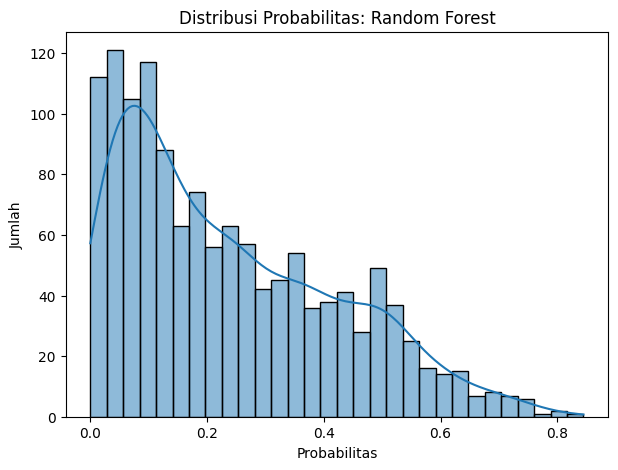


XGBoost Evaluation:


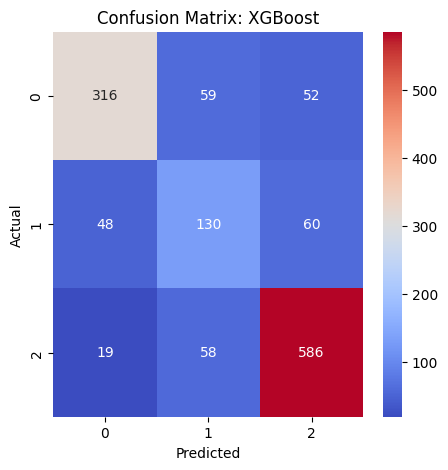


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       427
           1       0.53      0.55      0.54       238
           2       0.84      0.88      0.86       663

    accuracy                           0.78      1328
   macro avg       0.73      0.72      0.73      1328
weighted avg       0.78      0.78      0.78      1328

 Accuracy: 0.7771| Precission: 0.7788| F-1: 0.7769


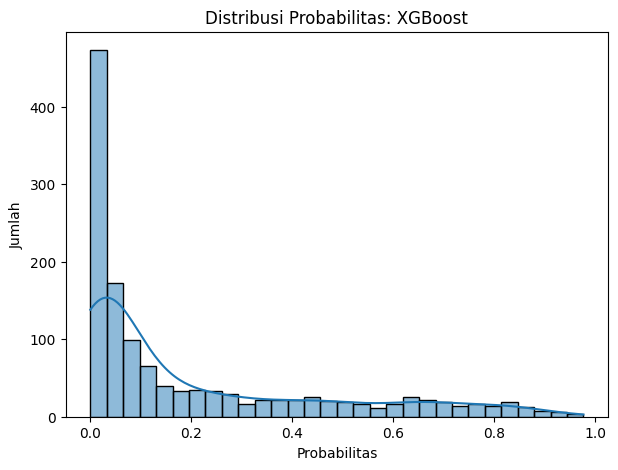

In [119]:
for name, model in models.items():
    if name == 'Logistic Regression':
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"\n{name} Evaluation:")
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f" Accuracy: {accuracy_score(y_test, y_pred):.4f}| Precission: {precision_score(y_test, y_pred,average='weighted'):.4f}| F-1: {f1_score(y_test, y_pred,average='weighted'):.4f}")
    plt.figure(figsize=(7,5))
    sns.histplot(y_proba,bins=30, edgecolor='black', kde=True)
    plt.title(f"Distribusi Probabilitas: {name}")
    plt.xlabel("Probabilitas")
    plt.ylabel("Jumlah")
    plt.show()

In [120]:
# Ambil feature importance
xgb_importance = models['XGBoost'].feature_importances_
xgb_features = pd.Series(xgb_importance, index=X.columns).sort_values(ascending=False)

In [121]:
xgb_features.head(10)

Curricular_units_2nd_sem_approved       0.174489
Tuition_fees_up_to_date                 0.096543
Curricular_units_1st_sem_approved       0.049586
Curricular_units_1st_sem_enrolled       0.042422
Curricular_units_2nd_sem_grade          0.037415
Debtor                                  0.036370
Curricular_units_2nd_sem_enrolled       0.033199
Course                                  0.024589
Curricular_units_2nd_sem_credited       0.024488
Curricular_units_1st_sem_evaluations    0.023733
dtype: float32

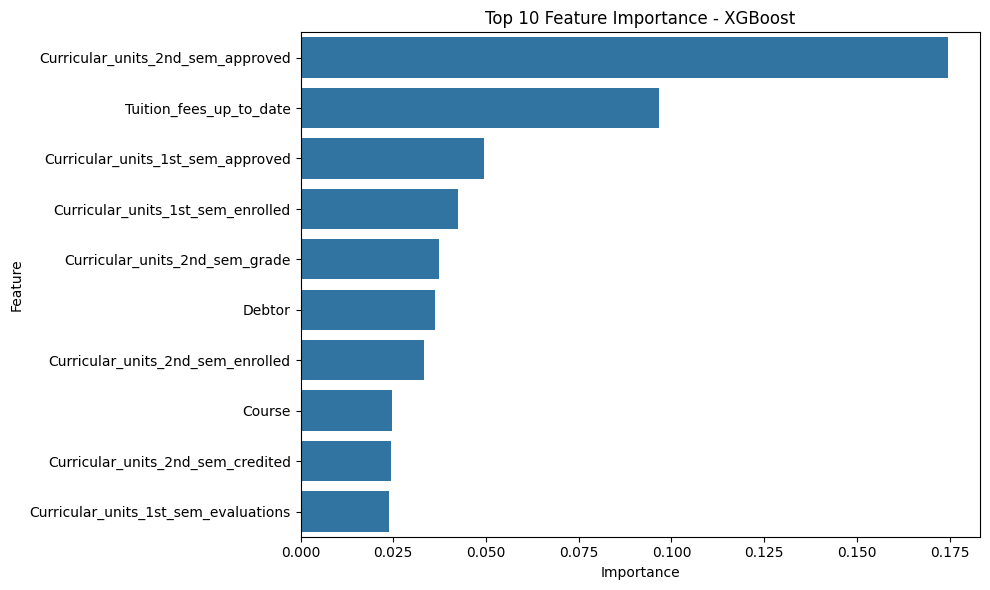

In [122]:
# Visualisasikan
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_features[:10], y=xgb_features.index[:10])
plt.title('Top 10 Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [123]:
xgb_features.to_excel('./output-files/feature importance.xlsx')

## Deployment

In [124]:
# Simpan model dan scaler
joblib.dump(grid_xgb.best_estimator_, './model/model_xgb.pkl')
joblib.dump(encoder, './model/label_encoder.pkl')

['./model/label_encoder.pkl']

### Inferensi Model

In [129]:
#Load Model
load_model = joblib.load("./model/model_xgb.pkl")
load_encoder = joblib.load("./model/label_encoder.pkl")

In [132]:
#Load dataset
new_df = prep_df.copy()

In [133]:
new_df['Status'] = load_encoder.transform(new_df['Status'])
X = new_df.drop(columns={'Status','Status_encoded'})

In [134]:
# Prediksi kelas: 0 = tidak resign, 1 = resign
new_df['Status_Prediction'] = load_model.predict(X)

# Probabilitas risiko attrition (kemungkinan resign)
new_df['Probability'] = load_model.predict_proba(X)[:, 1]  # nilai antara 0 - 1

new_df

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_encoded,Status_Prediction,Probability
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0.000000,0,10.8,1.4,1.74,0,0,0,0.028033
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,13.666667,0,13.9,-0.3,0.79,2,2,2,0.012711
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0.000000,0,10.8,1.4,1.74,0,0,0,0.000435
3,1,17,2,9773,1,1,122.0,1,38,37,...,5,12.400000,0,9.4,-0.8,-3.12,2,2,2,0.078840
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,13.000000,0,13.9,-0.3,0.79,2,2,2,0.040114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,5,12.666667,0,15.5,2.8,-4.06,2,2,2,0.152165
4420,1,1,2,9773,1,1,120.0,105,1,1,...,2,11.000000,0,11.1,0.6,2.02,0,0,0,0.041257
4421,1,1,1,9500,1,1,154.0,1,37,37,...,1,13.500000,0,13.9,-0.3,0.79,0,0,0,0.013092
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,12.000000,0,9.4,-0.8,-3.12,2,2,2,0.017083


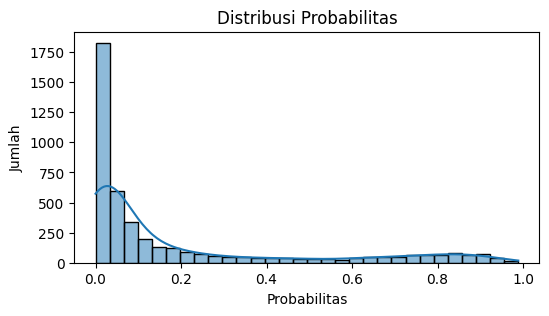

In [143]:
plt.figure(figsize=(6,3))
sns.histplot(new_df['Probability'],bins=30, edgecolor='black', kde=True)
plt.title(f"Distribusi Probabilitas")
plt.xlabel("Probabilitas")
plt.ylabel("Jumlah")
plt.show()

In [136]:
high_threshold = new_df['Probability'].quantile(0.85)
medium_threshold = new_df['Probability'].quantile(0.60)

def categorize_risk(score):
    if score >= high_threshold: 
        return "High"
    elif score >= medium_threshold:
        return "Medium"
    else:
        return "Low"

In [137]:
#Kategorisasi Probabilitas
new_df['RiskLevel'] = new_df['Probability'].apply(categorize_risk)

In [141]:
res_df = prep_df.copy()
res_df = res_df.drop(columns='Status_encoded')

res_df['Status_Prediction'] = load_encoder.inverse_transform(new_df['Status_Prediction'])
res_df['Probability'] = new_df['Probability']
res_df['RiskLevel'] = new_df['RiskLevel']
res_df

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_Prediction,Probability,RiskLevel
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0.000000,0,10.8,1.4,1.74,Dropout,Dropout,0.028033,Low
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,Graduate,0.012711,Low
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0.000000,0,10.8,1.4,1.74,Dropout,Dropout,0.000435,Low
3,1,17,2,9773,1,1,122.0,1,38,37,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,Graduate,0.078840,Low
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,Graduate,0.040114,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,5,12.666667,0,15.5,2.8,-4.06,Graduate,Graduate,0.152165,Medium
4420,1,1,2,9773,1,1,120.0,105,1,1,...,2,11.000000,0,11.1,0.6,2.02,Dropout,Dropout,0.041257,Low
4421,1,1,1,9500,1,1,154.0,1,37,37,...,1,13.500000,0,13.9,-0.3,0.79,Dropout,Dropout,0.013092,Low
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,12.000000,0,9.4,-0.8,-3.12,Graduate,Graduate,0.017083,Low


In [144]:
# Export dataset yang telah diprediksi
res_df.to_csv('./output-files/predict_employee_data.csv',index=False, float_format="%.4f")
res_df.to_excel('./output-files/predict_employee_data.xlsx',index=False, float_format="%.4f")